# Feature Engineering

- Libraries

In [2]:
import pandas as pd
import sklearn as sk
import numpy as np

- Data

In [3]:
# In second notebook
%store -r final_df

In [4]:
final_df = final_df

## 1. Encoding

- Status is an object, country is also an object.
- I will not encode country because of the number of dimensions, I don't think it also adds value/weight to out predictions as is.

In [5]:
final_df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

- Status has two categories, I will use OneHotEncoder

### OneHotEncoder

- Import OHE from sklearn

In [6]:
from sklearn.preprocessing import OneHotEncoder

- Parse OHE to variable enc

In [7]:
enc = OneHotEncoder(sparse_output=False)
enc_array = enc.fit_transform(final_df[['Status']])

- Encode

In [8]:
# Get feature names (column names for the encoded features)
feature_names = enc.get_feature_names_out(['Status'])

# Create a DataFrame with encoded values
encoded_df = pd.DataFrame(enc_array, columns=feature_names)

# Concatenate with original DataFrame (if needed)
final_df_encoded = pd.concat([final_df.drop('Status', axis=1), encoded_df], axis=1)

- Final encoded df

In [9]:
final_df_encoded.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [10]:
df = final_df_encoded

## 2. Transforming data

- Reinitialize the columns

In [11]:
cols2 = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing']

- Import the kde_plt_grid method

In [12]:
import sys
import os

# Add the parent directory to sys.path to access utils/
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.kde_plt import kde_plt_grid  # Import the function

- Pass our data

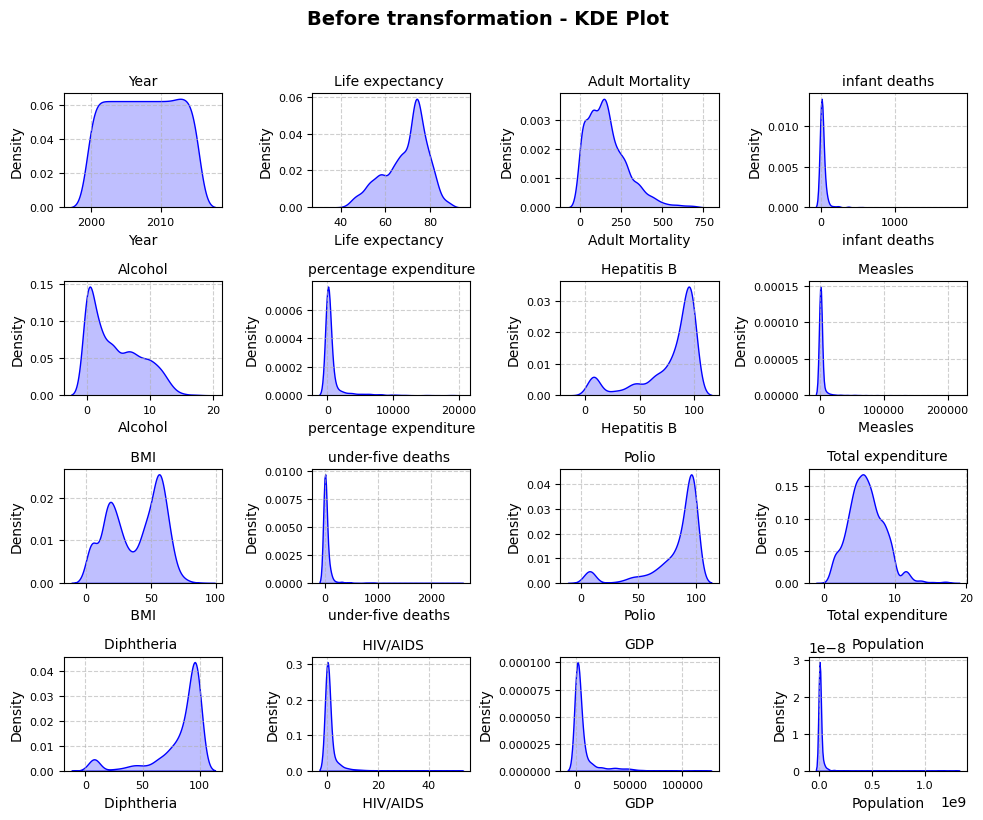

In [13]:
kde_plt_grid(df, cols2, 'Before transformation - KDE Plot')

> There is visible skew in our data

### a. Skewness

- Skewness is a measure of the asymmetry of a distribution.

> A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.     
> A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
> A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.


In [14]:
df[cols2].skew()

Year                               -0.006409
Life expectancy                    -0.641348
Adult Mortality                     1.176477
infant deaths                       9.786963
Alcohol                             0.604600
percentage expenditure              4.652051
Hepatitis B                        -1.508544
Measles                             9.441332
 BMI                               -0.197379
under-five deaths                   9.495065
Polio                              -2.070211
Total expenditure                   0.628101
Diphtheria                         -2.056656
 HIV/AIDS                           5.396112
GDP                                 3.511815
Population                         17.332212
 thinness  1-19 years               1.708024
 thinness 5-9 years                 1.778947
Income composition of resources    -1.128536
Schooling                          -0.619125
Status_Developed                    1.718238
Status_Developing                  -1.718238
dtype: flo

Skew in 
> Adult Mortality
> infant deaths
> percentage expenditure
> Hepatitis B
> Measles
> under-five months
> polio
> Diptheria
> HIV/AIDS
> GDP
> Population

### b. Kurtosis

- kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

- The kurtosis of a normal distribution is 3.
- If a given distribution has a kurtosis less than 3, it is said to be #playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If a given distribution has a kurtosis greater than 3, it is said to be #leptokurtic, which means it tends to produce more outliers than the normal distribution.

In [15]:
df[cols2].kurt()

Year                                -1.213722
Life expectancy                     -0.226412
Adult Mortality                      1.756646
infant deaths                      116.042756
Alcohol                             -0.779822
percentage expenditure              26.573387
Hepatitis B                          1.138465
Measles                            114.859903
 BMI                                -1.302949
under-five deaths                  109.752795
Polio                                3.625335
Total expenditure                    1.124652
Diphtheria                           3.484149
 HIV/AIDS                           34.892008
GDP                                 14.946594
Population                         362.646601
 thinness  1-19 years                3.995507
 thinness 5-9 years                  4.391798
Income composition of resources      1.321339
Schooling                            0.915995
Status_Developed                     0.952991
Status_Developing                 

- BoxCox tranformation for moderate skew and log transformation for high skew

In [33]:
from scipy.stats import boxcox

# Log transformation (adding 1 to avoid log(0)) - for very high skew, reducing scale impact
columns_log = ['infant deaths', 'percentage expenditure', 'Measles ', 
               'under-five deaths ', 'GDP', 'Population', 
               ' thinness  1-19 years', ' thinness 5-9 years']

df[columns_log] = np.log1p(df[columns_log])

# Box-Cox transformation (requires positive values)- for moderate skew that still needs correction
columns_boxcox = ['Adult Mortality','Hepatitis B',' HIV/AIDS',  'Polio', 'Diphtheria ', 'Income composition of resources', 'Alcohol', 'Life expectancy ']
for col in columns_boxcox:
    df[col], _ = boxcox(df[col] + 1)  # Add 1 to handle zeros

In [34]:
df[cols2].skew()

Year                              -0.006409
Life expectancy                   -0.105617
Adult Mortality                   -0.096805
infant deaths                     -0.038592
Alcohol                           -0.180546
percentage expenditure            -0.863936
Hepatitis B                       -0.897340
Measles                           -0.140376
 BMI                              -0.197379
under-five deaths                 -0.085727
Polio                             -1.020802
Total expenditure                  0.628101
Diphtheria                        -1.033850
 HIV/AIDS                          0.641535
GDP                               -0.817388
Population                        -1.395151
 thinness  1-19 years             -0.407593
 thinness 5-9 years               -0.457818
Income composition of resources   -0.093333
Schooling                         -0.619125
Status_Developed                   1.718238
Status_Developing                 -1.718238
dtype: float64

> The skew has been reduced significantly as the columns are closer to zero

In [35]:
df[cols2].kurt()

Year                              -1.213722
Life expectancy                   -0.542021
Adult Mortality                   -0.338460
infant deaths                     -1.353612
Alcohol                           -1.299965
percentage expenditure            -0.729901
Hepatitis B                       -0.538409
Measles                           -1.579187
 BMI                              -1.302949
under-five deaths                 -1.342545
Polio                             -0.180617
Total expenditure                  1.124652
Diphtheria                        -0.139579
 HIV/AIDS                         -1.444869
GDP                                1.278080
Population                         3.434902
 thinness  1-19 years             -0.540297
 thinness 5-9 years               -0.491319
Income composition of resources   -0.741846
Schooling                          0.915995
Status_Developed                   0.952991
Status_Developing                  0.952991
dtype: float64

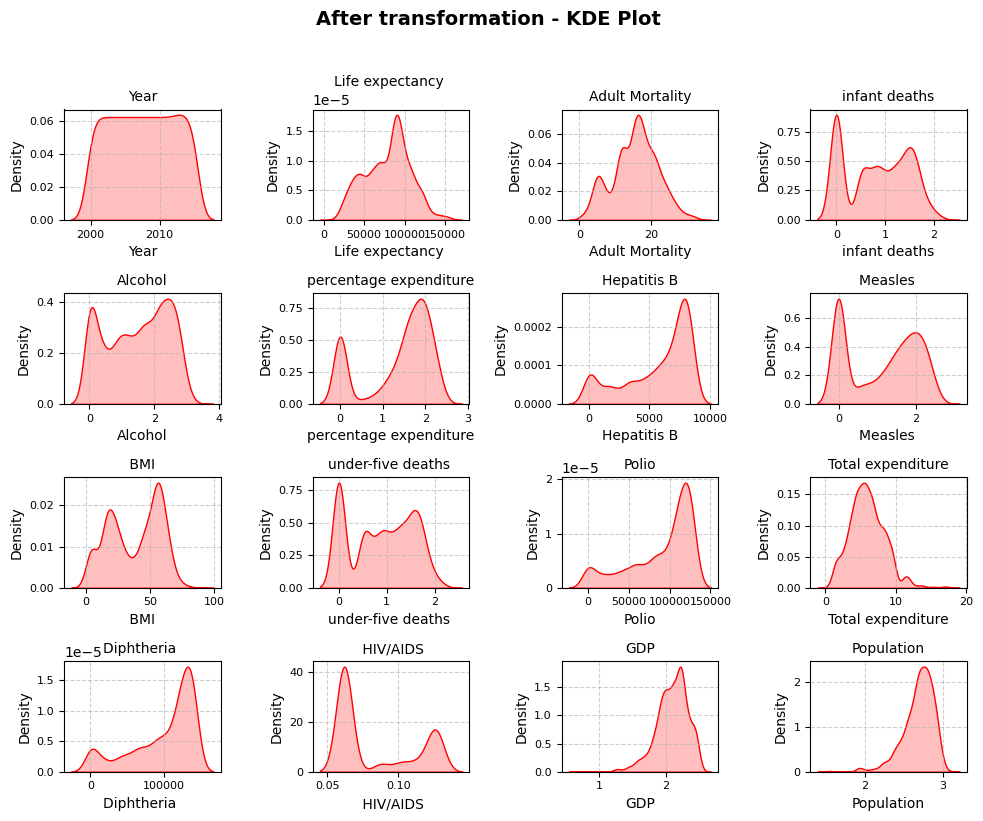

In [36]:
kde_plt_grid(df, cols2, 'After transformation - KDE Plot', 'Red')

## 3. Scaling

- Import standard scaler from sklearn

In [20]:
# Standardization for remaining numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

- Columns to scale are the same as the columns I 

In [23]:
df.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [37]:
scaled_cols = columns_log + columns_boxcox
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [38]:
df[scaled_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
infant deaths,2938.0,-2.079873e-16,1.00017,-1.298898,-1.298898,0.068870,0.933596,2.065878
percentage expenditure,2938.0,6.287989e-17,1.00017,-1.752485,-0.464691,0.352630,0.752358,1.299126
Measles,2938.0,1.451074e-16,1.00017,-1.243828,-1.243828,0.268560,0.904799,1.634146
under-five deaths,2938.0,-6.106605e-17,1.00017,-1.345638,-1.345638,0.124081,0.913249,1.991067
GDP,2938.0,-2.902149e-16,1.00017,-5.961775,-0.585263,0.113475,0.684215,1.881691
Population,2938.0,1.180207e-15,1.00017,-5.784533,-0.496874,0.170892,0.697698,2.035032
thinness 1-19 years,2938.0,-2.321719e-16,1.00017,-2.635387,-0.697637,0.098887,0.847187,1.980608
thinness 5-9 years,2938.0,-2.515196e-16,1.00017,-2.569340,-0.675192,0.103408,0.834871,1.965866
Adult Mortality,2938.0,-4.353223e-17,1.00017,-2.352908,-0.617901,0.073885,0.668537,2.791281
Hepatitis B,2938.0,3.845347e-16,1.00017,-2.078215,-0.676155,0.389376,0.815610,1.009320


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841,2000.000000,2004.000000,2008.000000,2012.000000,2015.000000
Life expectancy,2938.0,6.046143e-17,1.000170,-2.405664,-0.751648,0.199706,0.649713,2.706218
Adult Mortality,2938.0,-4.353223e-17,1.000170,-2.352908,-0.617901,0.073885,0.668537,2.791281
infant deaths,2938.0,-2.079873e-16,1.000170,-1.298898,-1.298898,0.068870,0.933596,2.065878
Alcohol,2938.0,-2.902149e-17,1.000170,-1.536249,-0.901371,0.139598,0.882231,1.908560
percentage expenditure,2938.0,6.287989e-17,1.000170,-1.752485,-0.464691,0.352630,0.752358,1.299126
Hepatitis B,2938.0,3.845347e-16,1.000170,-2.078215,-0.676155,0.389376,0.815610,1.009320
Measles,2938.0,1.451074e-16,1.000170,-1.243828,-1.243828,0.268560,0.904799,1.634146
BMI,2938.0,3.812308e+01,20.025359,1.000000,19.200000,43.000000,56.100000,87.300000
under-five deaths,2938.0,-6.106605e-17,1.000170,-1.345638,-1.345638,0.124081,0.913249,1.991067


- Save the scaler 

In [40]:

import joblib
joblib.dump(scaler, "/home/davidkibet/Desktop/Life Expectancy ML/models/LE_scaler.pkl")

['/home/davidkibet/Desktop/Life Expectancy ML/models/LE_scaler.pkl']

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841,2000.000000,2004.000000,2008.000000,2012.000000,2015.000000
Life expectancy,2938.0,6.046143e-17,1.000170,-2.405664,-0.751648,0.199706,0.649713,2.706218
Adult Mortality,2938.0,-4.353223e-17,1.000170,-2.352908,-0.617901,0.073885,0.668537,2.791281
infant deaths,2938.0,-2.079873e-16,1.000170,-1.298898,-1.298898,0.068870,0.933596,2.065878
Alcohol,2938.0,-2.902149e-17,1.000170,-1.536249,-0.901371,0.139598,0.882231,1.908560
percentage expenditure,2938.0,6.287989e-17,1.000170,-1.752485,-0.464691,0.352630,0.752358,1.299126
Hepatitis B,2938.0,3.845347e-16,1.000170,-2.078215,-0.676155,0.389376,0.815610,1.009320
Measles,2938.0,1.451074e-16,1.000170,-1.243828,-1.243828,0.268560,0.904799,1.634146
BMI,2938.0,3.812308e+01,20.025359,1.000000,19.200000,43.000000,56.100000,87.300000
under-five deaths,2938.0,-6.106605e-17,1.000170,-1.345638,-1.345638,0.124081,0.913249,1.991067


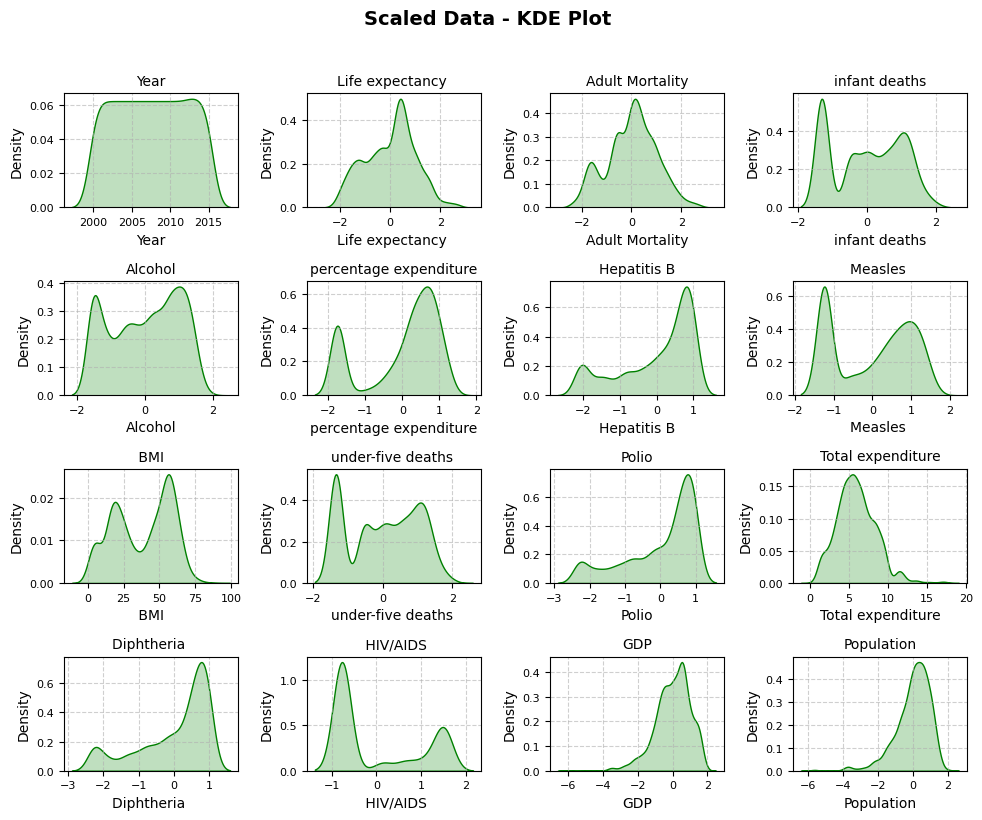

In [42]:
kde_plt_grid(df, cols2, 'Scaled Data - KDE Plot', 'Green')

In [44]:
%store df

Stored 'df' (DataFrame)
